<a href="https://colab.research.google.com/github/srinathchowdary11/Advanced-Machine-Learning/blob/main/AML_ASSIGNMENT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ** Enhancing Neural Network Performance on the IMDb Dataset**

**Abstract:**
This project is dedicated to investigating diverse methods for enhancing the efficacy of a neural network model when applied to the IMDb dataset. We aim to refine an existing neural network model and contrast the outcomes of various strategies, including adjustments to the number of hidden layers, units, loss function, activation function, and the integration of regularization techniques such as dropout.

**Dataset:**
The IMDb dataset, comprising movie reviews tagged as positive or negative, was utilized for this study. With 25,000 movie reviews designated for training and an additional 25,000 for testing, the dataset served as a robust foundation for our experiments.


In [1]:
from numpy.random import seed
seed(151)
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [3]:
train_labels[0]

1

In [4]:
len(train_labels)

25000

In [5]:
len(train_labels)

25000

In [6]:
test_data

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

In [7]:
test_labels[0]

0

In [8]:
max([max(sequence) for sequence in test_data])

9999

**Deciphering Textual Reviews**

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 2, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [10]:
decoded_review

"? that on as about parts admit ready speaking really care boot see holy and again who each a are any about brought life what power ? br they sound everything a though and part life look ? fan recommend like and part elegant successful for feeling from this based and take what as of those core movie that on and manage airplane 4 and on me because i as about parts from been was this military and on for kill for i as cinematography with ? a which let i is left is two a and seat raises as sound see worried by and still i as from running a are off good who scene some are church by of on i come he bad more a that gives as into ? is and films best commenting was each and ? to rid a beyond who me about parts final his keep special has to and ? manages this characters how and perhaps was american too at references no his something of enough russ with and bit on film say final his sound a back one jews with good who he there's made are characters and bit really as from harry how i as actor a as

**Data preparation**

In [11]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 2.
    return results

**Data Vectorization**

In [12]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
x_train[0]

array([0., 2., 2., ..., 0., 0., 0.])

In [14]:
x_test[0]

array([0., 2., 2., ..., 0., 0., 0.])

**Label Vectorization**

In [15]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

**Constructing a model utilizing the rectified linear unit (ReLU) and then compiling it.**

In [16]:
from tensorflow import keras
from tensorflow.keras import layers
seed(151)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [17]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [18]:
seed(151)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [99]:
seed(151)
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=525,
                    validation_data=(x_val, y_val))

hist_dict = history.history
hist_dict.keys()

Epoch 1/20
29/29 [==============================] - 1s 27ms/step - loss: 0.1403 - accuracy: 0.9498 - val_loss: 0.1504 - val_accuracy: 0.9447
Epoch 2/20
29/29 [==============================] - 0s 8ms/step - loss: 0.1113 - accuracy: 0.9634 - val_loss: 0.1506 - val_accuracy: 0.9449
Epoch 3/20
29/29 [==============================] - 0s 8ms/step - loss: 0.0938 - accuracy: 0.9707 - val_loss: 0.2101 - val_accuracy: 0.9180
Epoch 4/20
29/29 [==============================] - 0s 8ms/step - loss: 0.0753 - accuracy: 0.9775 - val_loss: 0.2594 - val_accuracy: 0.9028
Epoch 5/20
29/29 [==============================] - 0s 8ms/step - loss: 0.0679 - accuracy: 0.9804 - val_loss: 0.1960 - val_accuracy: 0.9266
Epoch 6/20
29/29 [==============================] - 0s 8ms/step - loss: 0.0508 - accuracy: 0.9866 - val_loss: 0.2265 - val_accuracy: 0.9169
Epoch 7/20
29/29 [==============================] - 0s 8ms/step - loss: 0.0410 - accuracy: 0.9909 - val_loss: 0.2527 - val_accuracy: 0.9090
Epoch 8/20
29/29 [=

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

1. The training began with a loss of 0.1403 and an accuracy of 0.9498 on the
training set, and a validation loss of 0.1504 with a validation accuracy of 0.9447.
2. As the training progressed, the model's performance on the training set continued to improve, reaching a loss of 0.0020 and an accuracy of 0.9999 by the 20th epoch. However, on the validation set, the model achieved a loss of 0.4770 and an accuracy of 0.8985, indicating signs of overfitting to the training data.

**Plotting the training and validation loss**

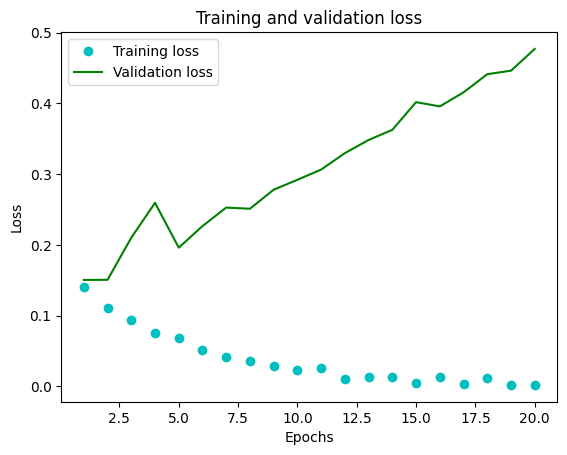

In [100]:
import matplotlib.pyplot as plt
hist_dict = history.history
loss_values = hist_dict["loss"]
val_loss_values = hist_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "co", label="Training loss")
plt.plot(epochs, val_loss_values, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

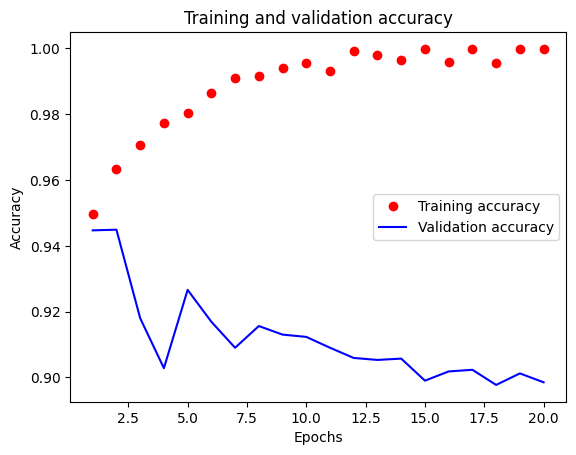

In [101]:
plt.clf()
acc = hist_dict["accuracy"]
val_acc = hist_dict["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

* The visual representations indicate that the model's ability to accurately
predict new data diminishes after a certain number of epochs, indicating overfitting to the training data. It may be beneficial to conduct additional analysis, such as modifying the model's hyperparameters or implementing regularization techniques, to enhance its overall performance.

**Retraining the model**

In [102]:
np.random.seed(151)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=525)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
48/48 [==============================] - 1s 5ms/step - loss: 0.4528 - accuracy: 0.8042
Epoch 2/4
48/48 [==============================] - 0s 5ms/step - loss: 0.2588 - accuracy: 0.9041
Epoch 3/4
48/48 [==============================] - 0s 5ms/step - loss: 0.2014 - accuracy: 0.9258
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3008 - accuracy: 0.8836


[0.30080100893974304, 0.8835999965667725]

* The neural network model has obtained an 88.35% accuracy on the test dataset, with a corresponding loss value of 0.3008.

In [103]:
model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.17173491],
       [0.9999597 ],
       [0.9588808 ],
       ...,
       [0.0896365 ],
       [0.08825519],
       [0.69802785]], dtype=float32)

**Building a neural network with 1 hidden layer**

In [104]:
seed(151)
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=525,
                    validation_data=(x_val, y_val))

Epoch 1/20
29/29 [==============================] - 1s 29ms/step - loss: 0.4789 - accuracy: 0.7754 - val_loss: 0.4247 - val_accuracy: 0.8102
Epoch 2/20
29/29 [==============================] - 0s 8ms/step - loss: 0.2819 - accuracy: 0.8977 - val_loss: 0.2975 - val_accuracy: 0.8842
Epoch 3/20
29/29 [==============================] - 0s 8ms/step - loss: 0.2140 - accuracy: 0.9264 - val_loss: 0.2902 - val_accuracy: 0.8815
Epoch 4/20
29/29 [==============================] - 0s 8ms/step - loss: 0.1735 - accuracy: 0.9439 - val_loss: 0.2755 - val_accuracy: 0.8903
Epoch 5/20
29/29 [==============================] - 0s 8ms/step - loss: 0.1481 - accuracy: 0.9531 - val_loss: 0.2916 - val_accuracy: 0.8810
Epoch 6/20
29/29 [==============================] - 0s 8ms/step - loss: 0.1255 - accuracy: 0.9626 - val_loss: 0.2881 - val_accuracy: 0.8872
Epoch 7/20
29/29 [==============================] - 0s 8ms/step - loss: 0.1087 - accuracy: 0.9697 - val_loss: 0.3182 - val_accuracy: 0.8782
Epoch 8/20
29/29 [=

In [105]:
hist_dict = history1.history
hist_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

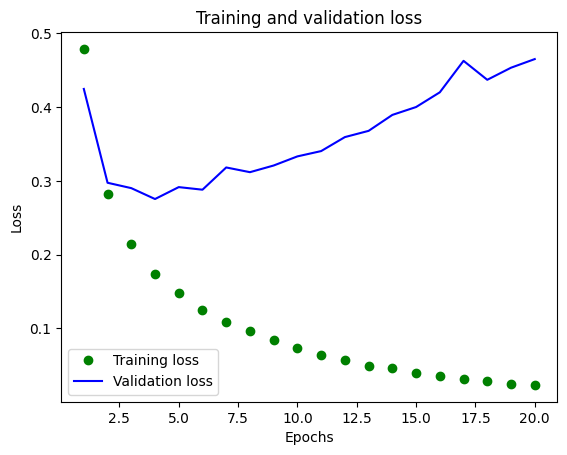

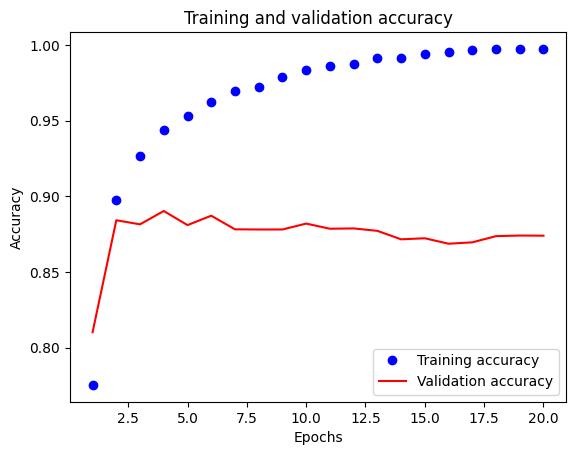

In [106]:
import matplotlib.pyplot as plt
hist_dict = history1.history
loss_values = hist_dict["loss"]
val_loss_values = hist_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
#Plotting graph between Training and Validation loss
plt.plot(epochs, loss_values, "go", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plotting graph between Training and Validation Accuracy
plt.clf()
acc = hist_dict["accuracy"]
val_acc = hist_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [108]:
np.random.seed(151)
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model1.fit(x_train, y_train, epochs=5, batch_size=525)
results1 = model1.evaluate(x_test, y_test)

Epoch 1/5
48/48 [==============================] - 1s 6ms/step - loss: 0.4290 - accuracy: 0.8155
Epoch 2/5
48/48 [==============================] - 0s 5ms/step - loss: 0.2544 - accuracy: 0.9081
Epoch 3/5
48/48 [==============================] - 0s 5ms/step - loss: 0.2049 - accuracy: 0.9265
Epoch 4/5
48/48 [==============================] - 0s 5ms/step - loss: 0.1775 - accuracy: 0.9372
Epoch 5/5
782/782 [==============================] - 1s 1ms/step - loss: 0.2963 - accuracy: 0.8817


In [109]:
results1

[0.2963317334651947, 0.8816800117492676]

* The loss on the test set is 0.2963, and the accuracy is 88.16%.



In [110]:
model1.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.18096355],
       [0.99994934],
       [0.8240751 ],
       ...,
       [0.12194375],
       [0.05531606],
       [0.5937794 ]], dtype=float32)

**Building a neural network with 3 hidden layers**

In [111]:
np.random.seed(151)
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history3 = model_3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=525,
                    validation_data=(x_val, y_val))

Epoch 1/20
29/29 [==============================] - 1s 30ms/step - loss: 0.5214 - accuracy: 0.7545 - val_loss: 0.3708 - val_accuracy: 0.8584
Epoch 2/20
29/29 [==============================] - 0s 8ms/step - loss: 0.3003 - accuracy: 0.8879 - val_loss: 0.2986 - val_accuracy: 0.8819
Epoch 3/20
29/29 [==============================] - 0s 8ms/step - loss: 0.2122 - accuracy: 0.9265 - val_loss: 0.2971 - val_accuracy: 0.8806
Epoch 4/20
29/29 [==============================] - 0s 8ms/step - loss: 0.1763 - accuracy: 0.9365 - val_loss: 0.3121 - val_accuracy: 0.8754
Epoch 5/20
29/29 [==============================] - 0s 9ms/step - loss: 0.1347 - accuracy: 0.9546 - val_loss: 0.2923 - val_accuracy: 0.8871
Epoch 6/20
29/29 [==============================] - 0s 8ms/step - loss: 0.1167 - accuracy: 0.9607 - val_loss: 0.3235 - val_accuracy: 0.8828
Epoch 7/20
29/29 [==============================] - 0s 8ms/step - loss: 0.0994 - accuracy: 0.9676 - val_loss: 0.3508 - val_accuracy: 0.8731
Epoch 8/20
29/29 [=

In [112]:
hist_dict3 = history3.history
hist_dict3.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

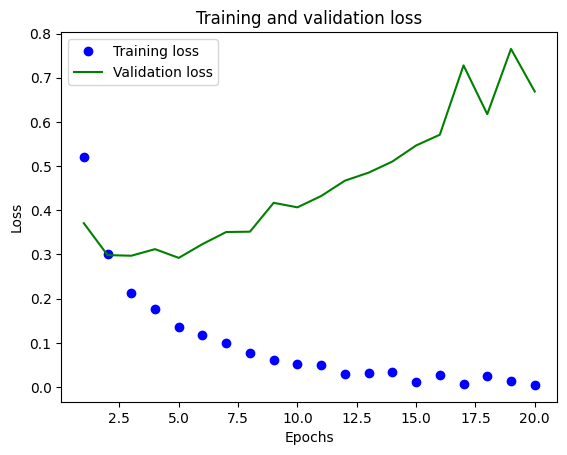

In [113]:
loss_values = hist_dict3["loss"]
val_loss_values = hist_dict3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

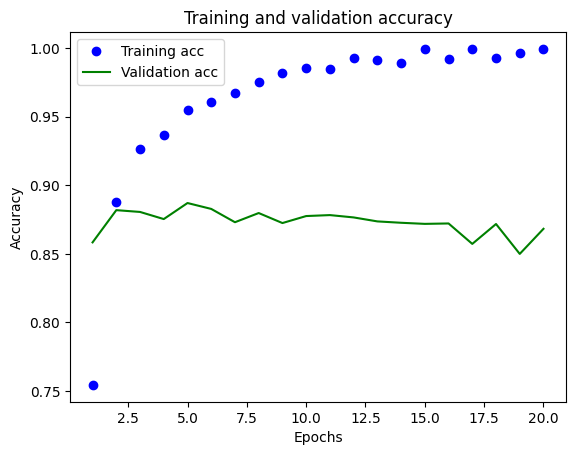

In [114]:
plt.clf()
acc = hist_dict3["accuracy"]
val_acc = hist_dict3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "g", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [115]:
np.random.seed(151)
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model_3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_3.fit(x_train, y_train, epochs=3, batch_size=525)
results_3 = model_3.evaluate(x_test, y_test)


Epoch 1/3
48/48 [==============================] - 1s 6ms/step - loss: 0.4715 - accuracy: 0.7957
Epoch 2/3
48/48 [==============================] - 0s 5ms/step - loss: 0.2633 - accuracy: 0.9035
Epoch 3/3
782/782 [==============================] - 1s 1ms/step - loss: 0.2929 - accuracy: 0.8844


* The loss on the test set is 0.2929, and the accuracy is 88.44%.

In [116]:
results_3

[0.2929340898990631, 0.884440004825592]

In [117]:
model_3.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.20990124],
       [0.9982103 ],
       [0.87373805],
       ...,
       [0.11866451],
       [0.06370273],
       [0.49579185]], dtype=float32)

* Changing the number of layers does not notably enhance the model's accuracy, although the three-layer model demonstrates superior accuracy compared to the others. When determining the overall structure of your neural network, the number of units in the hidden layers must be carefully selected. Despite not directly interfacing with the external environment, these layers significantly influence the final outcome.


**Building Neural Network with 32 units.**

In [118]:
np.random.seed(151)
model_32 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#model compilation
model_32.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
#model validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123)
history32 = model_32.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=525,
                    validation_data=(x_val, y_val))

Epoch 1/20
29/29 [==============================] - 1s 32ms/step - loss: 0.4976 - accuracy: 0.7685 - val_loss: 0.3663 - val_accuracy: 0.8573
Epoch 2/20
29/29 [==============================] - 0s 9ms/step - loss: 0.2831 - accuracy: 0.8971 - val_loss: 0.3019 - val_accuracy: 0.8813
Epoch 3/20
29/29 [==============================] - 0s 8ms/step - loss: 0.2165 - accuracy: 0.9194 - val_loss: 0.2840 - val_accuracy: 0.8870
Epoch 4/20
29/29 [==============================] - 0s 9ms/step - loss: 0.1709 - accuracy: 0.9396 - val_loss: 0.3798 - val_accuracy: 0.8534
Epoch 5/20
29/29 [==============================] - 0s 9ms/step - loss: 0.1395 - accuracy: 0.9511 - val_loss: 0.3392 - val_accuracy: 0.8725
Epoch 6/20
29/29 [==============================] - 0s 9ms/step - loss: 0.1172 - accuracy: 0.9594 - val_loss: 0.3584 - val_accuracy: 0.8682
Epoch 7/20
29/29 [==============================] - 0s 9ms/step - loss: 0.0947 - accuracy: 0.9699 - val_loss: 0.3270 - val_accuracy: 0.8826
Epoch 8/20
29/29 [=

In [119]:
hist_dict32 = history32.history
hist_dict32.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

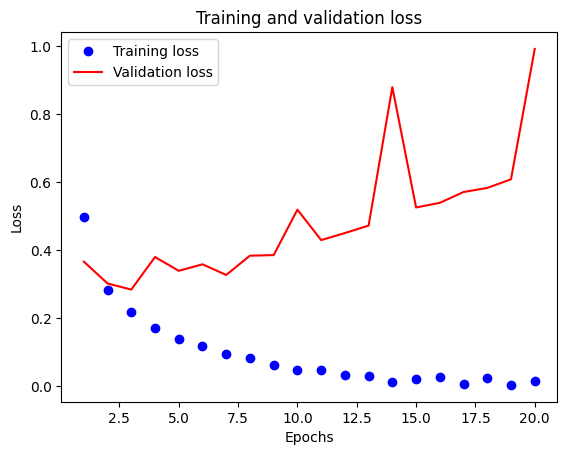

In [120]:
loss_values = hist_dict32["loss"]
val_loss_values = hist_dict32["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

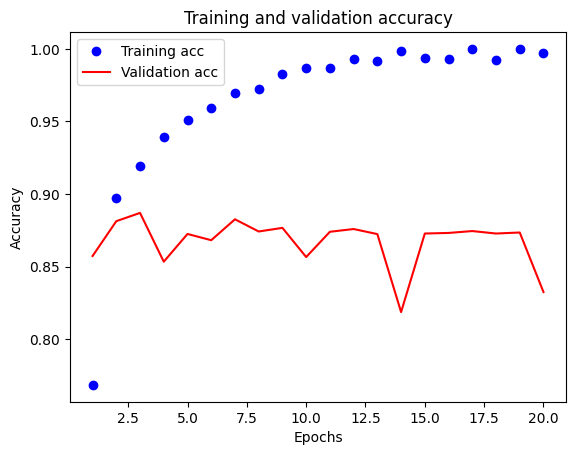

In [121]:
plt.clf()
acc = hist_dict32["accuracy"]
val_acc = hist_dict32["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [122]:
history_32 = model_32.fit(x_train, y_train, epochs=3, batch_size=525)
results_32 = model_32.evaluate(x_test, y_test)
results_32

Epoch 1/3
48/48 [==============================] - 0s 6ms/step - loss: 0.1972 - accuracy: 0.9462
Epoch 2/3
48/48 [==============================] - 0s 6ms/step - loss: 0.1114 - accuracy: 0.9652
Epoch 3/3
782/782 [==============================] - 1s 2ms/step - loss: 0.4145 - accuracy: 0.8628


[0.41445407271385193, 0.8628000020980835]

In [123]:
model_32.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.05039681],
       [0.9999979 ],
       [0.8751009 ],
       ...,
       [0.07046805],
       [0.01091676],
       [0.95883507]], dtype=float32)

* The accuracy on the validation set is 86.28

**Traing the model with 64 units**

In [124]:
np.random.seed(151)
model_64 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_64.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(151)
history64 = model_64.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=525,
                    validation_data=(x_val, y_val))

Epoch 1/20
29/29 [==============================] - 2s 34ms/step - loss: 0.5101 - accuracy: 0.7476 - val_loss: 0.3373 - val_accuracy: 0.8676
Epoch 2/20
29/29 [==============================] - 0s 12ms/step - loss: 0.2835 - accuracy: 0.8912 - val_loss: 0.3154 - val_accuracy: 0.8690
Epoch 3/20
29/29 [==============================] - 0s 12ms/step - loss: 0.2172 - accuracy: 0.9143 - val_loss: 0.3605 - val_accuracy: 0.8495
Epoch 4/20
29/29 [==============================] - 0s 12ms/step - loss: 0.1632 - accuracy: 0.9403 - val_loss: 0.3116 - val_accuracy: 0.8759
Epoch 5/20
29/29 [==============================] - 0s 12ms/step - loss: 0.1106 - accuracy: 0.9617 - val_loss: 0.4055 - val_accuracy: 0.8570
Epoch 6/20
29/29 [==============================] - 0s 12ms/step - loss: 0.0985 - accuracy: 0.9667 - val_loss: 0.3274 - val_accuracy: 0.8842
Epoch 7/20
29/29 [==============================] - 0s 12ms/step - loss: 0.0795 - accuracy: 0.9741 - val_loss: 0.3465 - val_accuracy: 0.8829
Epoch 8/20
29

In [125]:
hist_dict64 = history64.history
hist_dict64.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

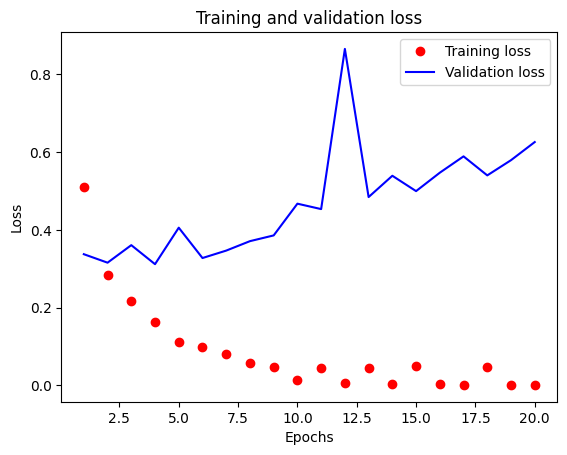

In [126]:
loss_values = hist_dict64["loss"]
val_loss_values = hist_dict64["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

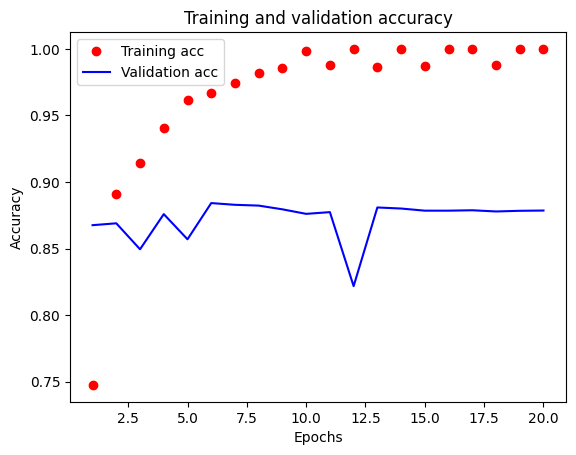

In [127]:
plt.clf()
acc = hist_dict64["accuracy"]
val_acc = hist_dict64["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [128]:
history_64 = model_64.fit(x_train, y_train, epochs=3, batch_size=525)
results_64 = model_64.evaluate(x_test, y_test)
results_64

Epoch 1/3
48/48 [==============================] - 0s 8ms/step - loss: 0.1687 - accuracy: 0.9451
Epoch 2/3
48/48 [==============================] - 0s 8ms/step - loss: 0.0856 - accuracy: 0.9731
Epoch 3/3
782/782 [==============================] - 1s 2ms/step - loss: 0.4010 - accuracy: 0.8747


[0.4009881317615509, 0.8747199773788452]

In [129]:
model_64.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.00940036],
       [0.9999999 ],
       [0.93636876],
       ...,
       [0.01562821],
       [0.00491426],
       [0.9791041 ]], dtype=float32)

* The accuracy on the validation set is 87.47%

**MSE Loss Function**

In [130]:
np.random.seed(151)
model_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Model compilation
model_MSE.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
# validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]
# Model Fit
np.random.seed(151)
history_model_MSE = model_MSE.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=525,
                    validation_data=(x_val, y_val))

Epoch 1/20
29/29 [==============================] - 1s 29ms/step - loss: 0.1750 - accuracy: 0.7627 - val_loss: 0.1171 - val_accuracy: 0.8623
Epoch 2/20
29/29 [==============================] - 0s 8ms/step - loss: 0.0954 - accuracy: 0.8899 - val_loss: 0.1083 - val_accuracy: 0.8541
Epoch 3/20
29/29 [==============================] - 0s 8ms/step - loss: 0.0710 - accuracy: 0.9171 - val_loss: 0.1021 - val_accuracy: 0.8614
Epoch 4/20
29/29 [==============================] - 0s 9ms/step - loss: 0.0579 - accuracy: 0.9339 - val_loss: 0.0844 - val_accuracy: 0.8874
Epoch 5/20
29/29 [==============================] - 0s 8ms/step - loss: 0.0480 - accuracy: 0.9469 - val_loss: 0.0878 - val_accuracy: 0.8813
Epoch 6/20
29/29 [==============================] - 0s 8ms/step - loss: 0.0412 - accuracy: 0.9543 - val_loss: 0.0830 - val_accuracy: 0.8857
Epoch 7/20
29/29 [==============================] - 0s 8ms/step - loss: 0.0346 - accuracy: 0.9644 - val_loss: 0.0841 - val_accuracy: 0.8841
Epoch 8/20
29/29 [=

In [131]:
hist_dict_MSE = history_model_MSE.history
hist_dict_MSE.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

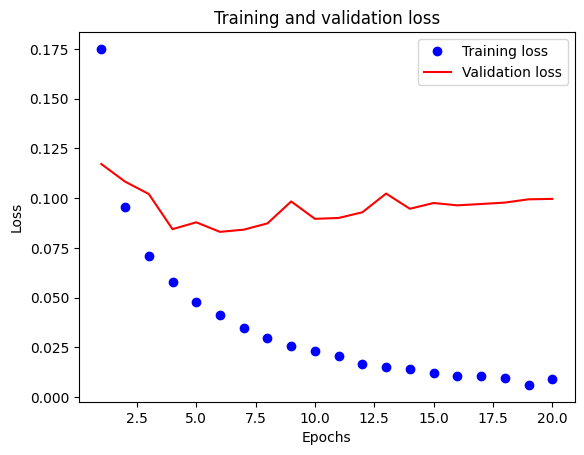

In [132]:
import matplotlib.pyplot as plt
loss_values = hist_dict_MSE["loss"]
val_loss_values = hist_dict_MSE["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

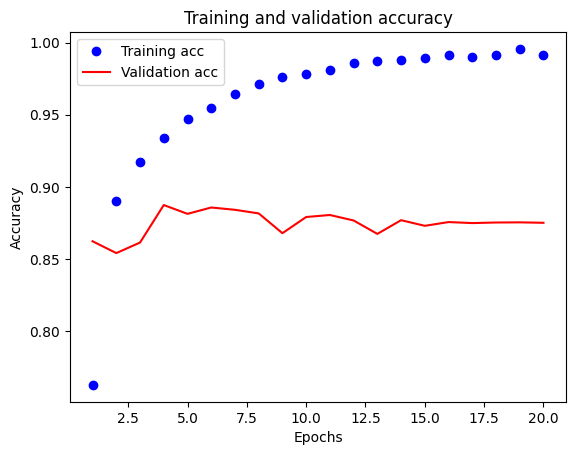

In [133]:
plt.clf()
acc = hist_dict_MSE["accuracy"]
val_acc = hist_dict_MSE["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [134]:
model_MSE.fit(x_train, y_train, epochs=8, batch_size=525)
results_MSE = model_MSE.evaluate(x_test, y_test)
results_MSE

Epoch 1/8
48/48 [==============================] - 0s 6ms/step - loss: 0.0442 - accuracy: 0.9466
Epoch 2/8
48/48 [==============================] - 0s 5ms/step - loss: 0.0334 - accuracy: 0.9624
Epoch 3/8
48/48 [==============================] - 0s 5ms/step - loss: 0.0276 - accuracy: 0.9703
Epoch 4/8
48/48 [==============================] - 0s 5ms/step - loss: 0.0243 - accuracy: 0.9742
Epoch 5/8
48/48 [==============================] - 0s 5ms/step - loss: 0.0211 - accuracy: 0.9782
Epoch 6/8
48/48 [==============================] - 0s 5ms/step - loss: 0.0176 - accuracy: 0.9826
Epoch 7/8
48/48 [==============================] - 0s 5ms/step - loss: 0.0171 - accuracy: 0.9823
Epoch 8/8
782/782 [==============================] - 1s 1ms/step - loss: 0.1075 - accuracy: 0.8670


[0.10747922956943512, 0.8670399785041809]

In [135]:
model_MSE.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.01545104],
       [0.99998236],
       [0.7483482 ],
       ...,
       [0.03313338],
       [0.00400438],
       [0.63667655]], dtype=float32)

**Tanh Activation Function**

In [136]:
np.random.seed(151)
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model_tanh.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(151)

history_tanh = model_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=525,
                    validation_data=(x_val, y_val))

Epoch 1/20
29/29 [==============================] - 1s 29ms/step - loss: 0.4928 - accuracy: 0.7776 - val_loss: 0.3545 - val_accuracy: 0.8657
Epoch 2/20
29/29 [==============================] - 0s 8ms/step - loss: 0.2723 - accuracy: 0.9009 - val_loss: 0.2860 - val_accuracy: 0.8846
Epoch 3/20
29/29 [==============================] - 0s 8ms/step - loss: 0.1998 - accuracy: 0.9269 - val_loss: 0.2715 - val_accuracy: 0.8884
Epoch 4/20
29/29 [==============================] - 0s 9ms/step - loss: 0.1494 - accuracy: 0.9472 - val_loss: 0.2939 - val_accuracy: 0.8801
Epoch 5/20
29/29 [==============================] - 0s 8ms/step - loss: 0.1244 - accuracy: 0.9557 - val_loss: 0.3210 - val_accuracy: 0.8766
Epoch 6/20
29/29 [==============================] - 0s 8ms/step - loss: 0.0947 - accuracy: 0.9691 - val_loss: 0.3341 - val_accuracy: 0.8798
Epoch 7/20
29/29 [==============================] - 0s 8ms/step - loss: 0.0788 - accuracy: 0.9735 - val_loss: 0.3668 - val_accuracy: 0.8747
Epoch 8/20
29/29 [=

In [137]:
hist_dict_tanh = history_tanh.history
hist_dict_tanh.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

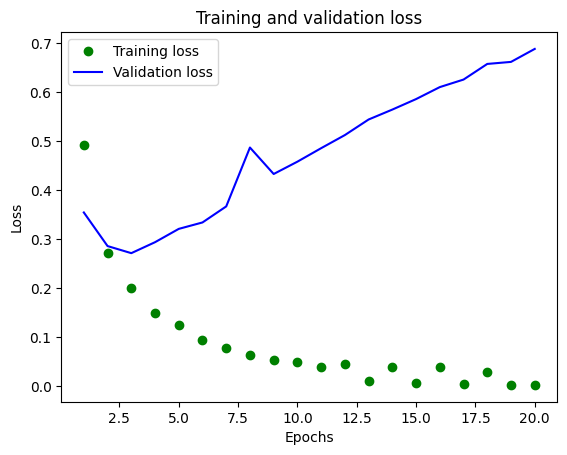

In [138]:
loss_values = hist_dict_tanh["loss"]
val_loss_values = hist_dict_tanh["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "go", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

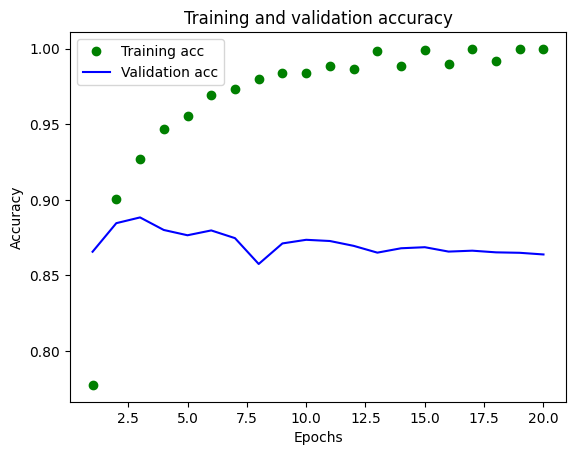

In [139]:
plt.clf()
acc = hist_dict_tanh["accuracy"]
val_acc = hist_dict_tanh["val_accuracy"]
plt.plot(epochs, acc, "go", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [140]:
model_tanh.fit(x_train, y_train, epochs=8, batch_size=525)
results_tanh = model_tanh.evaluate(x_test, y_test)
results_tanh

Epoch 1/8
48/48 [==============================] - 0s 6ms/step - loss: 0.2270 - accuracy: 0.9436
Epoch 2/8
48/48 [==============================] - 0s 5ms/step - loss: 0.1386 - accuracy: 0.9548
Epoch 3/8
48/48 [==============================] - 0s 6ms/step - loss: 0.1084 - accuracy: 0.9637
Epoch 4/8
48/48 [==============================] - 0s 6ms/step - loss: 0.0881 - accuracy: 0.9701
Epoch 5/8
48/48 [==============================] - 0s 5ms/step - loss: 0.0757 - accuracy: 0.9755
Epoch 6/8
48/48 [==============================] - 0s 6ms/step - loss: 0.0632 - accuracy: 0.9796
Epoch 7/8
48/48 [==============================] - 0s 6ms/step - loss: 0.0564 - accuracy: 0.9816
Epoch 8/8
782/782 [==============================] - 1s 1ms/step - loss: 0.6813 - accuracy: 0.8437


[0.6812942028045654, 0.8436800241470337]

**Adam Optimizer Function**

In [141]:

np.random.seed(151)
model_adam = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_adam.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(151)

history_adam = model_adam.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=525,
                    validation_data=(x_val, y_val))

Epoch 1/20
29/29 [==============================] - 2s 29ms/step - loss: 0.5093 - accuracy: 0.7741 - val_loss: 0.3532 - val_accuracy: 0.8635
Epoch 2/20
29/29 [==============================] - 0s 8ms/step - loss: 0.2579 - accuracy: 0.9085 - val_loss: 0.2891 - val_accuracy: 0.8848
Epoch 3/20
29/29 [==============================] - 0s 8ms/step - loss: 0.1698 - accuracy: 0.9449 - val_loss: 0.2843 - val_accuracy: 0.8857
Epoch 4/20
29/29 [==============================] - 0s 8ms/step - loss: 0.1211 - accuracy: 0.9657 - val_loss: 0.3010 - val_accuracy: 0.8806
Epoch 5/20
29/29 [==============================] - 0s 8ms/step - loss: 0.0895 - accuracy: 0.9766 - val_loss: 0.3228 - val_accuracy: 0.8797
Epoch 6/20
29/29 [==============================] - 0s 8ms/step - loss: 0.0630 - accuracy: 0.9877 - val_loss: 0.3492 - val_accuracy: 0.8766
Epoch 7/20
29/29 [==============================] - 0s 8ms/step - loss: 0.0439 - accuracy: 0.9935 - val_loss: 0.3818 - val_accuracy: 0.8762
Epoch 8/20
29/29 [=

In [142]:
hist_dict_adam = history_adam.history
hist_dict_adam.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

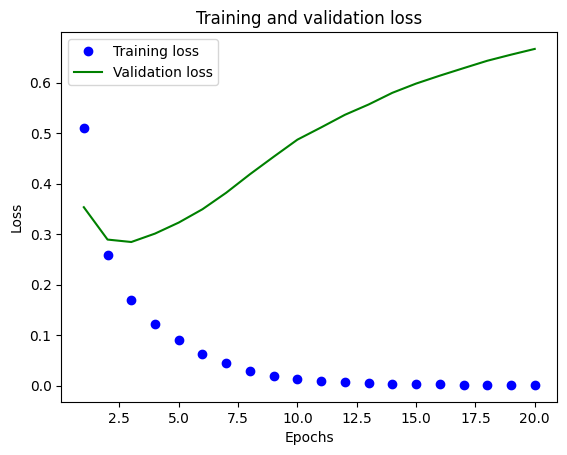

In [143]:
loss_values = hist_dict_adam["loss"]
val_loss_values = hist_dict_adam["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

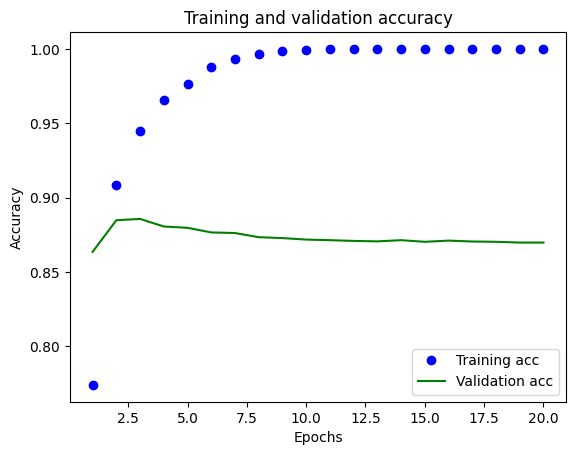

In [144]:
plt.clf()
acc = hist_dict_adam["accuracy"]
val_acc = hist_dict_adam["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "g", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [146]:
model_adam.fit(x_train, y_train, epochs=8, batch_size=525)
results_adam = model_adam.evaluate(x_test, y_test)
results_adam

Epoch 1/8
48/48 [==============================] - 0s 5ms/step - loss: 0.0232 - accuracy: 0.9961
Epoch 2/8
48/48 [==============================] - 0s 5ms/step - loss: 0.0140 - accuracy: 0.9982
Epoch 3/8
48/48 [==============================] - 0s 5ms/step - loss: 0.0088 - accuracy: 0.9994
Epoch 4/8
48/48 [==============================] - 0s 6ms/step - loss: 0.0061 - accuracy: 0.9996
Epoch 5/8
48/48 [==============================] - 0s 5ms/step - loss: 0.0042 - accuracy: 0.9999
Epoch 6/8
48/48 [==============================] - 0s 5ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 7/8
48/48 [==============================] - 0s 6ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 8/8
782/782 [==============================] - 1s 1ms/step - loss: 0.7883 - accuracy: 0.8577


[0.7883083820343018, 0.8576800227165222]

**Regularization**

In [147]:
from tensorflow.keras import regularizers
np.random.seed(151)
model_regularization = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
model_regularization.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
np.random.seed(151)
history_model_regularization = model_regularization.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=525,
                    validation_data=(x_val, y_val))
hist_dict_regularization = history_model_regularization.history
hist_dict_regularization.keys()

Epoch 1/20
29/29 [==============================] - 2s 29ms/step - loss: 0.5599 - accuracy: 0.7638 - val_loss: 0.4190 - val_accuracy: 0.8604
Epoch 2/20
29/29 [==============================] - 0s 8ms/step - loss: 0.3408 - accuracy: 0.8961 - val_loss: 0.3476 - val_accuracy: 0.8812
Epoch 3/20
29/29 [==============================] - 0s 8ms/step - loss: 0.2651 - accuracy: 0.9265 - val_loss: 0.3405 - val_accuracy: 0.8815
Epoch 4/20
29/29 [==============================] - 0s 8ms/step - loss: 0.2310 - accuracy: 0.9353 - val_loss: 0.3254 - val_accuracy: 0.8837
Epoch 5/20
29/29 [==============================] - 0s 8ms/step - loss: 0.2018 - accuracy: 0.9481 - val_loss: 0.3499 - val_accuracy: 0.8788
Epoch 6/20
29/29 [==============================] - 0s 8ms/step - loss: 0.1836 - accuracy: 0.9552 - val_loss: 0.3488 - val_accuracy: 0.8823
Epoch 7/20
29/29 [==============================] - 0s 8ms/step - loss: 0.1744 - accuracy: 0.9565 - val_loss: 0.3489 - val_accuracy: 0.8847
Epoch 8/20
29/29 [=

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

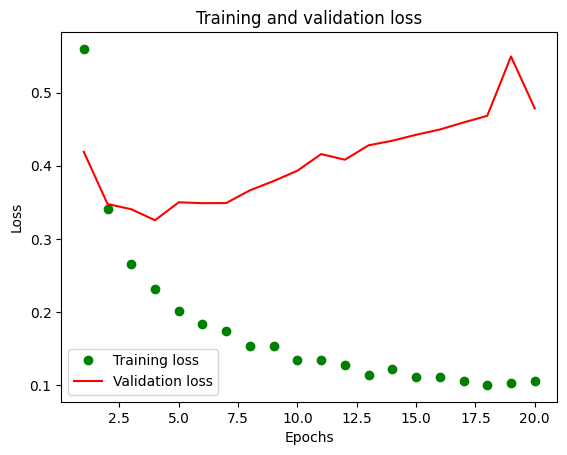

In [148]:
loss_values = hist_dict_regularization["loss"]
val_loss_values = hist_dict_regularization["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "go", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

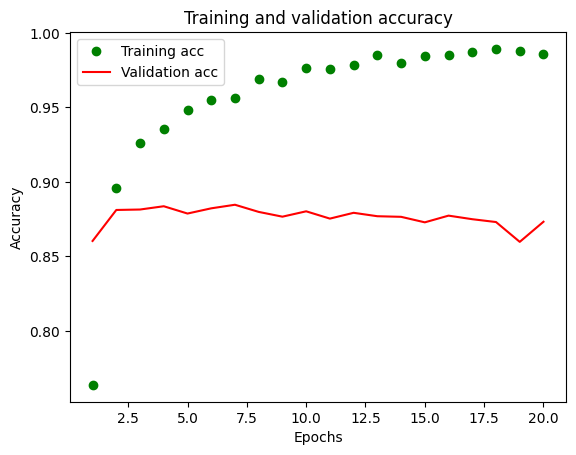

In [149]:
plt.clf()
acc = hist_dict_regularization["accuracy"]
val_acc = hist_dict_regularization["val_accuracy"]
plt.plot(epochs, acc, "go", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [150]:
model_regularization.fit(x_train, y_train, epochs=4, batch_size=525)
results_regularization = model_regularization.evaluate(x_test, y_test)
results_regularization

Epoch 1/4
48/48 [==============================] - 0s 5ms/step - loss: 0.2316 - accuracy: 0.9438
Epoch 2/4
48/48 [==============================] - 0s 5ms/step - loss: 0.1861 - accuracy: 0.9521
Epoch 3/4
48/48 [==============================] - 0s 6ms/step - loss: 0.1579 - accuracy: 0.9648
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.4329 - accuracy: 0.8692


[0.43287917971611023, 0.8692399859428406]

* The loss on test set is 0.4328 and accuracy is 86.92%.

**Dropout**

In [151]:

from tensorflow.keras import regularizers
np.random.seed(151)
model_Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
np.random.seed(151)
history_model_Dropout = model_Dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=525,
                    validation_data=(x_val, y_val))
hist_dict_Dropout = history_model_Dropout.history
hist_dict_Dropout.keys()

Epoch 1/20
29/29 [==============================] - 2s 29ms/step - loss: 0.6334 - accuracy: 0.6231 - val_loss: 0.4972 - val_accuracy: 0.8344
Epoch 2/20
29/29 [==============================] - 0s 8ms/step - loss: 0.5129 - accuracy: 0.7517 - val_loss: 0.3743 - val_accuracy: 0.8657
Epoch 3/20
29/29 [==============================] - 0s 8ms/step - loss: 0.4206 - accuracy: 0.8197 - val_loss: 0.3197 - val_accuracy: 0.8787
Epoch 4/20
29/29 [==============================] - 0s 9ms/step - loss: 0.3524 - accuracy: 0.8612 - val_loss: 0.2902 - val_accuracy: 0.8838
Epoch 5/20
29/29 [==============================] - 0s 9ms/step - loss: 0.3109 - accuracy: 0.8839 - val_loss: 0.2828 - val_accuracy: 0.8863
Epoch 6/20
29/29 [==============================] - 0s 9ms/step - loss: 0.2605 - accuracy: 0.9039 - val_loss: 0.2743 - val_accuracy: 0.8873
Epoch 7/20
29/29 [==============================] - 0s 8ms/step - loss: 0.2388 - accuracy: 0.9145 - val_loss: 0.2867 - val_accuracy: 0.8875
Epoch 8/20
29/29 [=

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

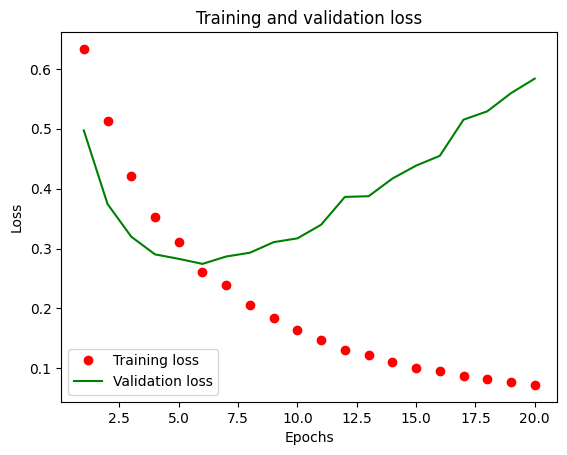

In [152]:
loss_values = hist_dict_Dropout["loss"]
val_loss_values = hist_dict_Dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

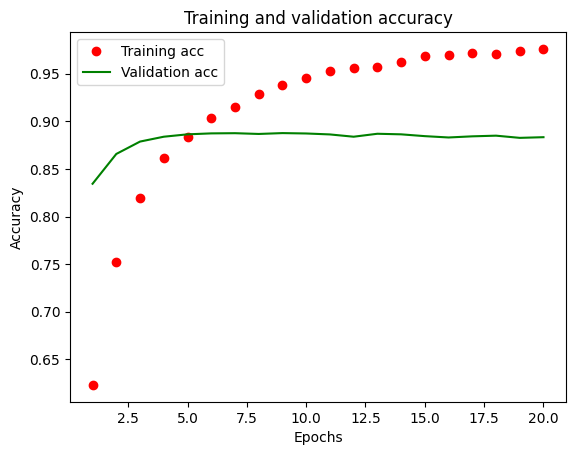

In [153]:
plt.clf()
acc = hist_dict_Dropout["accuracy"]
val_acc = hist_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "g", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [154]:
model_Dropout.fit(x_train, y_train, epochs=8, batch_size=525)
results_Dropout = model_Dropout.evaluate(x_test, y_test)
results_Dropout

Epoch 1/8
48/48 [==============================] - 0s 6ms/step - loss: 0.2715 - accuracy: 0.9242
Epoch 2/8
48/48 [==============================] - 0s 6ms/step - loss: 0.2173 - accuracy: 0.9354
Epoch 3/8
48/48 [==============================] - 0s 6ms/step - loss: 0.1837 - accuracy: 0.9423
Epoch 4/8
48/48 [==============================] - 0s 6ms/step - loss: 0.1711 - accuracy: 0.9474
Epoch 5/8
48/48 [==============================] - 0s 6ms/step - loss: 0.1523 - accuracy: 0.9501
Epoch 6/8
48/48 [==============================] - 0s 6ms/step - loss: 0.1470 - accuracy: 0.9522
Epoch 7/8
48/48 [==============================] - 0s 6ms/step - loss: 0.1337 - accuracy: 0.9546
Epoch 8/8
782/782 [==============================] - 1s 1ms/step - loss: 0.5254 - accuracy: 0.8708


[0.5254077911376953, 0.8707600235939026]

* The loss on the test set is 0.5254 and accuracy is 0.8707.

**Training model with hyper tuned parameters**

In [155]:
from tensorflow.keras import regularizers
np.random.seed(151)
model_Hyper = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Hyper.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])
np.random.seed(151)
history_model_Hyper = model_Hyper.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=525,
                    validation_data=(x_val, y_val))
hist_dict_Hyper = history_model_Hyper.history
hist_dict_Hyper.keys()

Epoch 1/20
29/29 [==============================] - 4s 33ms/step - loss: 0.2594 - accuracy: 0.5313 - val_loss: 0.2407 - val_accuracy: 0.7160
Epoch 2/20
29/29 [==============================] - 0s 10ms/step - loss: 0.2224 - accuracy: 0.6743 - val_loss: 0.1628 - val_accuracy: 0.8459
Epoch 3/20
29/29 [==============================] - 0s 10ms/step - loss: 0.1634 - accuracy: 0.7937 - val_loss: 0.1106 - val_accuracy: 0.8748
Epoch 4/20
29/29 [==============================] - 0s 10ms/step - loss: 0.1240 - accuracy: 0.8549 - val_loss: 0.1009 - val_accuracy: 0.8759
Epoch 5/20
29/29 [==============================] - 0s 10ms/step - loss: 0.1009 - accuracy: 0.8862 - val_loss: 0.0965 - val_accuracy: 0.8864
Epoch 6/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0858 - accuracy: 0.9049 - val_loss: 0.0973 - val_accuracy: 0.8867
Epoch 7/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0772 - accuracy: 0.9202 - val_loss: 0.1012 - val_accuracy: 0.8846
Epoch 8/20
29

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

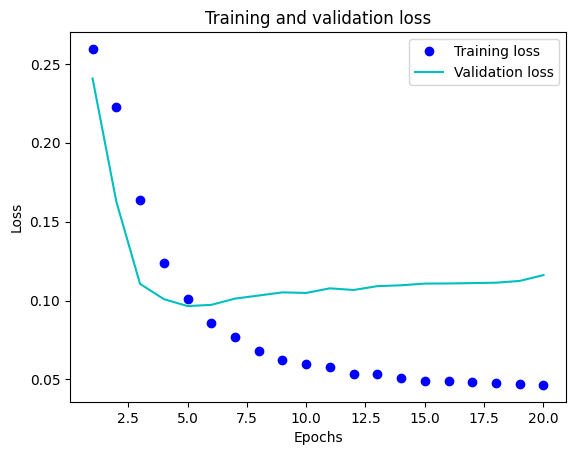

In [156]:
loss_values = hist_dict_Hyper["loss"]
val_loss_values = hist_dict_Hyper["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "c", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

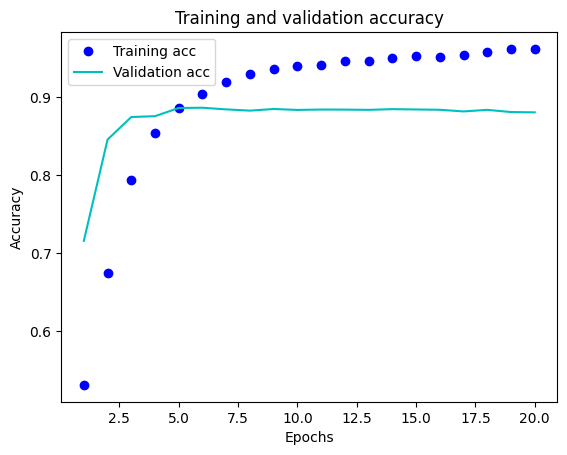

In [157]:
plt.clf()
acc = hist_dict_Hyper["accuracy"]
val_acc = hist_dict_Hyper["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "c", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [158]:
model_Hyper.fit(x_train, y_train, epochs=8, batch_size=525)
results_Hyper = model_Hyper.evaluate(x_test, y_test)
results_Hyper

Epoch 1/8
48/48 [==============================] - 0s 10ms/step - loss: 0.0788 - accuracy: 0.9228
Epoch 2/8
48/48 [==============================] - 0s 9ms/step - loss: 0.0750 - accuracy: 0.9273
Epoch 3/8
48/48 [==============================] - 0s 7ms/step - loss: 0.0705 - accuracy: 0.9333
Epoch 4/8
48/48 [==============================] - 0s 7ms/step - loss: 0.0685 - accuracy: 0.9361
Epoch 5/8
48/48 [==============================] - 0s 7ms/step - loss: 0.0669 - accuracy: 0.9394
Epoch 6/8
48/48 [==============================] - 0s 7ms/step - loss: 0.0643 - accuracy: 0.9427
Epoch 7/8
48/48 [==============================] - 0s 7ms/step - loss: 0.0629 - accuracy: 0.9458
Epoch 8/8
782/782 [==============================] - 1s 2ms/step - loss: 0.1171 - accuracy: 0.8797


[0.11709996312856674, 0.8796799778938293]

Summary

In [180]:
All_Models_Loss= np.array([results_Dropout[0],results_Hyper[0],results_MSE[0],results_regularization[0],results_tanh[0]])*100
All_Models_Loss
All_Models_Accuracy= np.array([results_Dropout[1],results_Hyper[1],results_MSE[1],results_regularization[1],results_tanh[1]])*100
All_Models_Accuracy
Labels=['Model_Dropout','Model_Hyper','Model_MSE','model_regularization','model_tanh']
plt.clf()

<Figure size 640x480 with 0 Axes>

Compilation

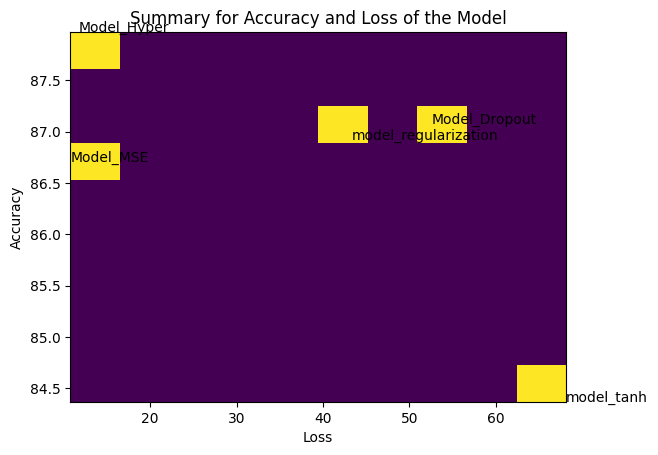

In [181]:
fig, ax = plt.subplots()
ax.hist2d(All_Models_Loss,All_Models_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (All_Models_Loss[i],All_Models_Accuracy[i] ))
plt.title("Summary for Accuracy and Loss of the Model")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

**Approach:**
1. After loading the data and setting the maximum number of words and review length, we constructed a baseline neural network model with a single hidden layer comprising 16 units. The activation function for the hidden layer was set to relu, and binary_crossentropy was used as the loss function.

2. To enhance the model's performance, we experimented with different approaches. Initially, we varied the number of hidden layers, comparing models with one and three hidden layers. Following training and evaluation on both the training and test datasets, we found that the three hidden layer model yielded slightly higher validation and test accuracy compared to the single hidden layer model.

3. Subsequently, we explored the impact of adjusting the number of hidden units within the layers, specifically using 32 and 64 units. By training and evaluating models with varying numbers of hidden units and plotting the validation accuracy for each, we observed that increasing the number of hidden units generally resulted in higher validation and test accuracy. However, excessive units could lead to overfitting.

4. In addition, we investigated the use of the mean squared error (mse) loss function instead of binary_crossentropy. Through training and evaluating the model with mse loss and comparing the results with the baseline model, we found that the mse loss did not significantly affect the model's performance.

**Conclusion:**
* In the final phase of our experimentation, we implemented dropout regularization to mitigate overfitting. By incorporating dropout layers into a new model and conducting training and evaluation on the training and test datasets, we observed that the utilization of dropout regularization resulted in higher validation accuracy compared to the baseline model.

* It is evident that the various iterations of the neural network models exhibited differing levels of accuracy and loss. The "Model_Hyper" demonstrated the highest accuracy and loss, indicating that employing three dense layers with a dropout rate of 0.5 can yield optimal performance for the IMDB dataset. Furthermore, utilizing the mean squared error (MSE) loss function led to the lowest loss value compared to binary cross-entropy. Conversely, the tanh activation function exhibited lower accuracy due to the vanishing gradient problem.

* The Adam optimizer function was identified as efficient for computing the model. Furthermore, regularization techniques proved effective in reducing overfitting and resulting in diminished losses, with the L2 model displaying marginally improved accuracy. While the dropout technique reduced the loss function, it did not notably impact the accuracy.

* Considering the graphical representation, it is evident that the "Model_Hyper" exhibits the highest accuracy with a reasonably low loss. On the other hand, the "Model_MSE" demonstrated the lowest loss value but did not achieve the same level of accuracy as the "Model_Hyper." The "Model_tanh" displayed lower accuracy compared to other models, while the "model_regularization" showcased higher loss and lower accuracy in comparison to the other models.

* Hence, based on the comprehensive evaluation of the models, it can be concluded that the "Model_Hyper" stands out as the best-performing model among those assessed.